In [97]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import os
import librosa
import librosa.display as lplt
import IPython
import glob

from tqdm import tqdm
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split
from visualkeras import layered_view
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import layers
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report

## Part 1: Data visualization

### 1.1 Csv file

In [68]:
# Read the data
data = pd.read_csv("features_30_sec.csv")

In [69]:
# Print the genres of music
genres = 'archive/Data'
print(list(os.listdir(f'{genres}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [70]:
# Print the data outline
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav      30          0.349951         0.088752  0.130192   
1  blues.00001.wav      30          0.340945         0.094968  0.095892   
2  blues.00002.wav      30          0.363562         0.085277  0.175494   
3  blues.00003.wav      30          0.404848         0.094018  0.141139   
4  blues.00004.wav      30          0.308598         0.087850  0.091540   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002830             1784.416546          129739.837401   
1  0.002374             1529.871314          376011.650101   
2  0.002753             1552.637786          156538.294709   
3  0.006340             1070.110059          184506.655421   
4  0.002305             1835.507009          343334.237041   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.657106            85829.345908  ...   52.464140   
1              2038.612143           213889.873843  ...   55.364292   
2              1747.382028            76150.688778  ...   40.620193   
3              1596.244204           166637.568438  ...   44.456993   
4              1748.367477            88460.061228  ...   86.012780   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.688358   36.564606    -0.409329   41.643623    -2.298869   55.076675   
1    -0.717028   60.113300     0.292333   48.137740    -0.285717   51.131210   
2    -7.721793   47.700275    -1.816497   52.418175    -3.434354   46.630066   
3    -3.320056   50.236970     0.637263   37.351920    -0.617507   37.291164   
4    -5.453736   75.328180    -0.924468   53.577564    -4.408076   62.928513   

   mfcc20_mean  mfcc20_var  label  
0     1.219947   46.975636  blues  
1     0.532144   45.823235  blues  
2    -2.231391   30.626228  blues  
3    -3.406940   31.988438  blues  
4   -11.701833   55.215122  blues  

[5 rows x 58 columns]

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 999 non-null    object 
 1   length                   999 non-null    int64  
 2   chroma_stft_mean         999 non-null    float64
 3   chroma_stft_var          999 non-null    float64
 4   rms_mean                 999 non-null    float64
 5   rms_var                  999 non-null    float64
 6   spectral_centroid_mean   999 non-null    float64
 7   spectral_centroid_var    999 non-null    float64
 8   spectral_bandwidth_mean  999 non-null    float64
 9   spectral_bandwidth_var   999 non-null    float64
 10  rolloff_mean             999 non-null    float64
 11  rolloff_var              999 non-null    float64
 12  zero_crossing_rate_mean  999 non-null    float64
 13  zero_crossing_rate_var   999 non-null    float64
 14  harmony_mean             9

In [72]:
# Print the data shape
data.shape

(999, 58)

In [73]:
# Print the type of data for the feature
data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var                  float64
mfcc6_mean                 float64
mfcc6_var           

In [74]:
# Remove unnecessary feature data
data = data.drop(labels='filename', axis=1)
data = data.drop(labels='length', axis=1)

### 1.2 Wav files (First track in blues)

In [75]:
audio = "archive/Data/genres_original/blues/blues.00000.wav"
#Load & decode the audio as a time series, where sr represents the sampling rate
wave , sr = librosa.load(audio)
print(type(data), type(sr))

<class 'pandas.core.frame.DataFrame'> <class 'int'>


In [76]:
# Print file information
print(librosa.load(audio, sr=sr))
print('data shape:', np.shape(wave))
print('Sample rate:', sr)
print('Len of audio', 661797/22050)

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32), 22050)
data shape: (661794,)
Sample rate: 22050
Len of audio 30.0134693877551


In [77]:
# Play the audio
IPython.display.Audio(wave, rate=sr)

#### Waveform and spectrogram

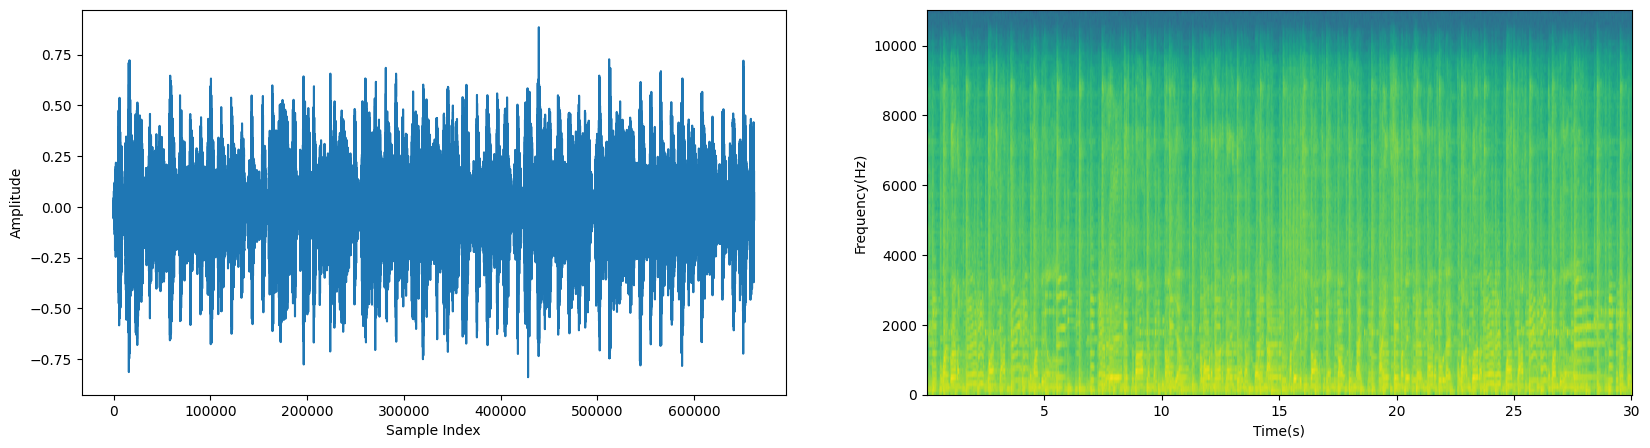

In [78]:
# Print the waveform and spectrogram
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(wave)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

plt.subplot(1,2,2)
plt.specgram(wave, Fs=sr)
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')

plt.show()

#### Short-time Fourier Transform

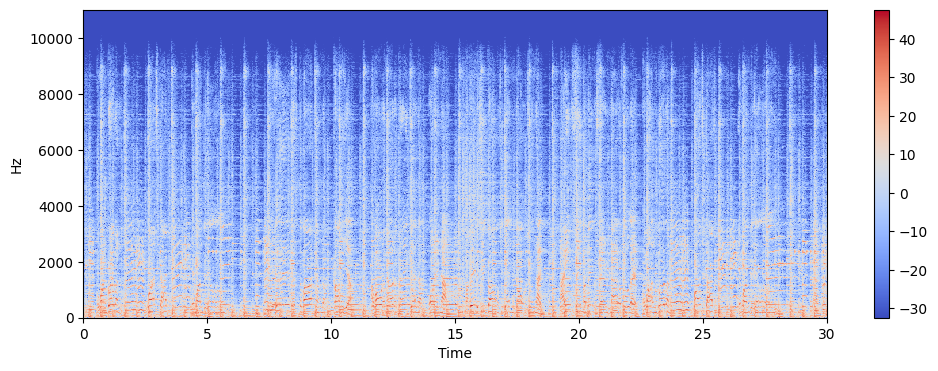

In [80]:
stft = librosa.stft(wave)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#### Fourier transform

(1025, 1293)


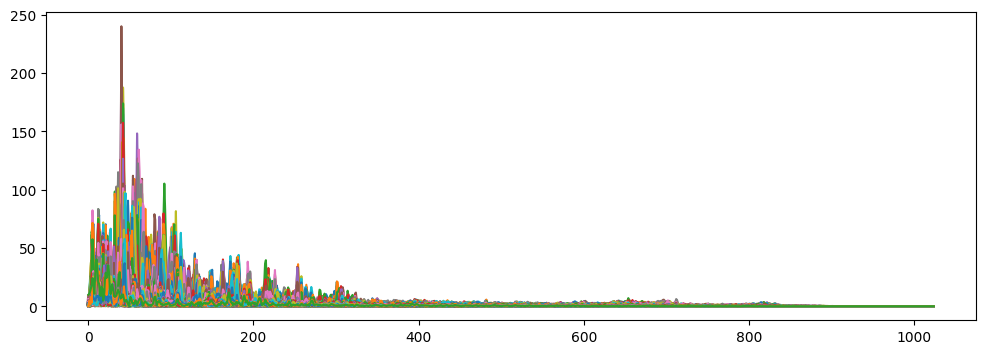

In [120]:
ws_fft = 2048 # window size
dt = np.abs(librosa.stft(wave, n_fft=ws_fft))
print(np.shape(dt))
plt.figure(figsize=(12,4))
plt.plot(dt)
plt.show()

#### Zero cross rate

In [88]:
# Print the total zero crossings
zero_cross = librosa.zero_crossings(wave, pad=False)
print(sum(zero_cross))

55031


#### Tepo

In [125]:
tempo, _ = librosa.beat.beat_track(y=wave, sr = sr)
tempo

123.046875

#### Mel Spectrogram

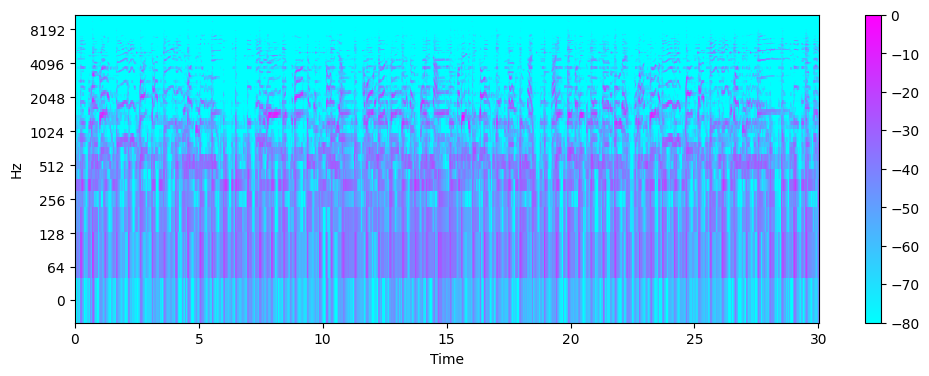

In [124]:
mel_s = librosa.feature.melspectrogram(y=wave, sr=sr)
mel_s_db = librosa.amplitude_to_db(mel_s, ref=np.max)
plt.figure(figsize=(12,4))
lplt.specshow(mel_s_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.show()

#### Chroma

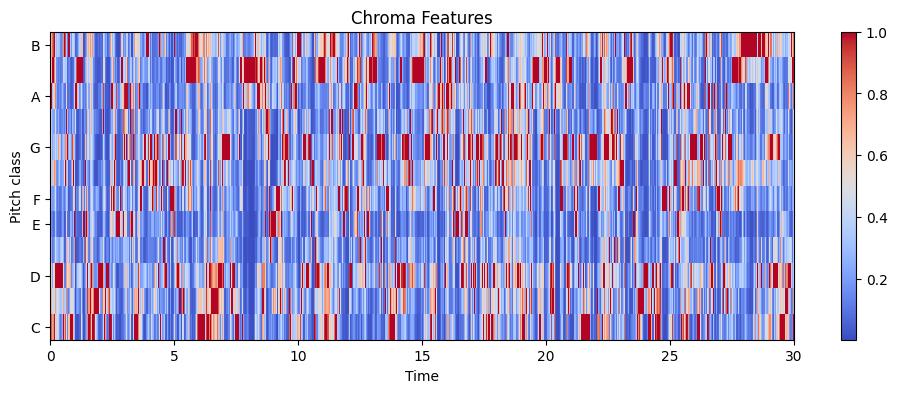

In [121]:
chroma = librosa.feature.chroma_stft(y=wave, sr=sr)
plt.figure(figsize=(12,4))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

#### Harmony

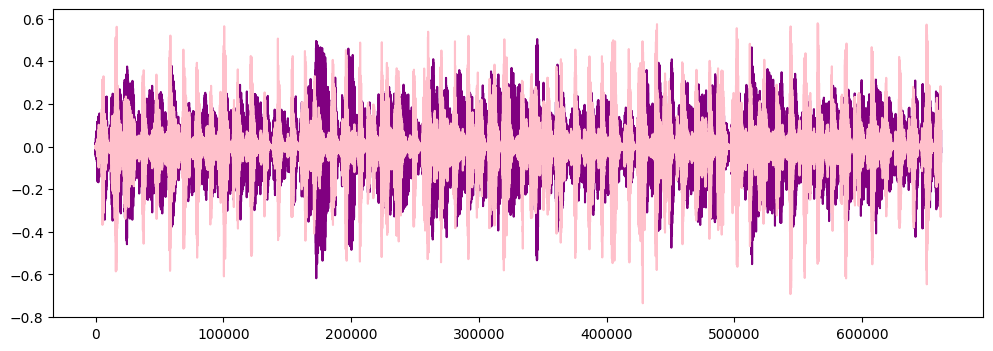

In [170]:
y_harm, y_perc = librosa.effects.hpss(wave)
plt.figure(figsize = (12, 4))
plt.plot(y_harm, color = 'purple')
plt.plot(y_perc, color = 'pink')
plt.show()

#### Spectral Centroid

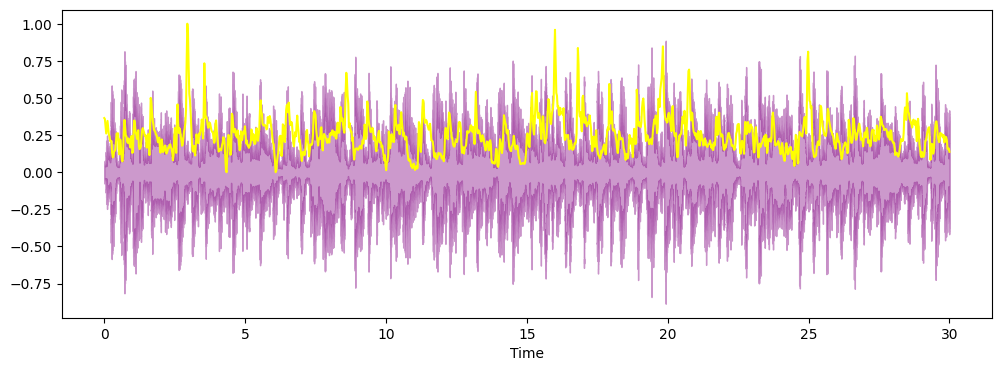

In [162]:
spectral_c = librosa.feature.spectral_centroid(y=wave, sr=sr)[0]
plt.figure(figsize = (12, 4))
frames = range(len(spectral_c))
time = librosa.frames_to_time(frames)
lplt.waveshow(y=wave, sr=sr, alpha=0.4, color = 'purple')
plt.plot(time, sklearn.preprocessing.minmax_scale(spectral_c), color='yellow')
plt.show()

#### Rolloff

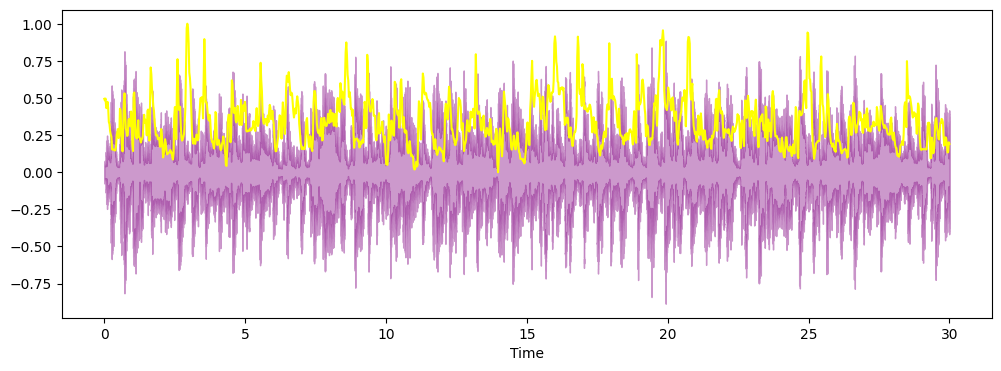

In [174]:
spectral_r = librosa.feature.spectral_rolloff(y=wave, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(wave, sr=sr, alpha=0.4, color='Purple')
plt.plot(time, normalize(spectral_r), color='yellow')
plt.show()

#### Mel-Frequency Cepstral Coefficients:

d:\Python\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\preprocessing\_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


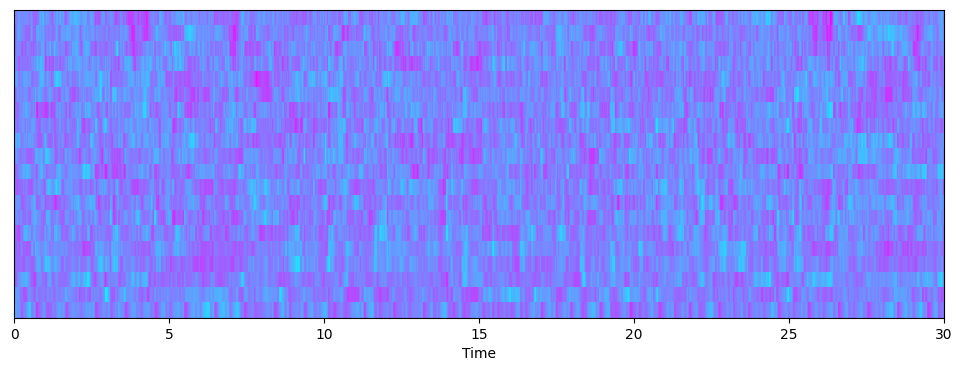

In [180]:
mfccs = librosa.feature.mfcc(y=wave,sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
plt.figure(figsize=(12,4))
lplt.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool')
plt.show()

## Part 2: Explore Feature

### 2.1 Explore feature correlations and the tempo distribution of different genres

In [18]:
# Use feature_30_sec.csv to explore the features
data2 = pd.read_csv("features_30_sec.csv")
data2.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav      30          0.349951         0.088752  0.130192   
1  blues.00001.wav      30          0.340945         0.094968  0.095892   
2  blues.00002.wav      30          0.363562         0.085277  0.175494   
3  blues.00003.wav      30          0.404848         0.094018  0.141139   
4  blues.00004.wav      30          0.308598         0.087850  0.091540   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002830             1784.416546          129739.837401   
1  0.002374             1529.871314          376011.650101   
2  0.002753             1552.637786          156538.294709   
3  0.006340             1070.110059          184506.655421   
4  0.002305             1835.507009          343334.237041   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.657106            85829.345908  ...   52.464140   
1              2038.612143           213889.873843  ...   55.364292   
2              1747.382028            76150.688778  ...   40.620193   
3              1596.244204           166637.568438  ...   44.456993   
4              1748.367477            88460.061228  ...   86.012780   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.688358   36.564606    -0.409329   41.643623    -2.298869   55.076675   
1    -0.717028   60.113300     0.292333   48.137740    -0.285717   51.131210   
2    -7.721793   47.700275    -1.816497   52.418175    -3.434354   46.630066   
3    -3.320056   50.236970     0.637263   37.351920    -0.617507   37.291164   
4    -5.453736   75.328180    -0.924468   53.577564    -4.408076   62.928513   

   mfcc20_mean  mfcc20_var  label  
0     1.219947   46.975636  blues  
1     0.532144   45.823235  blues  
2    -2.231391   30.626228  blues  
3    -3.406940   31.988438  blues  
4   -11.701833   55.215122  blues  

[5 rows x 58 columns]

#### Correlation heatmap for feature means

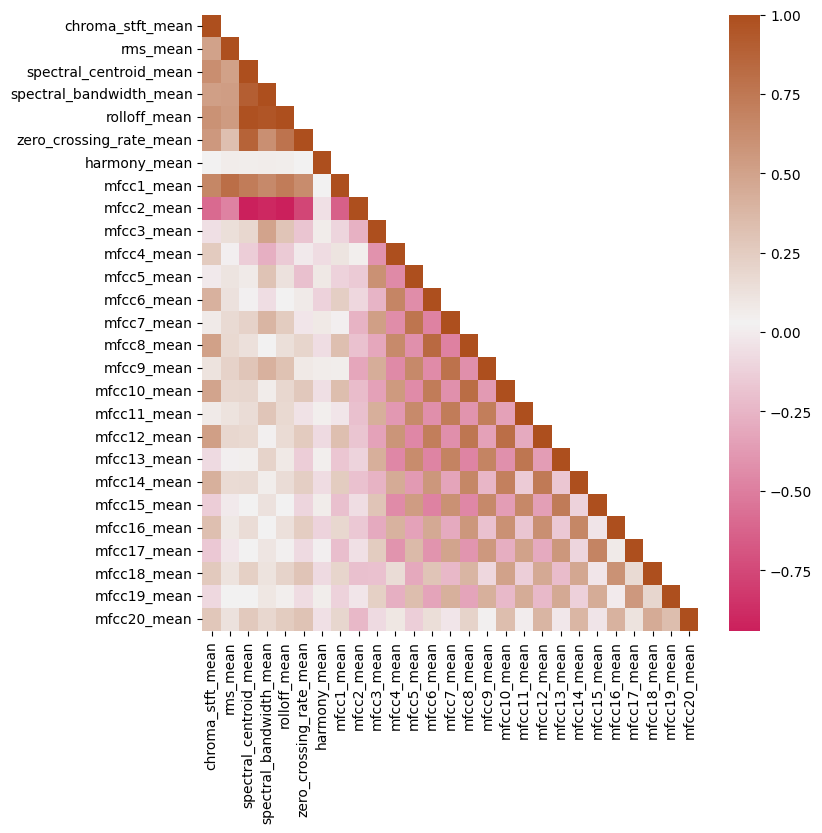

In [45]:
# Print a correlation heatmap (masked up triangle)
cols = [col for col in data2.columns if 'mean' in col]
corr = data2[cols].corr()

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

mask = np.zeros_like(corr)
for i in range(1,len(mask)):
  for j in range(0,i):
    mask[j][i] = True

plt.figure(figsize=(8, 8))
sns.heatmap(corr, cmap=cmap, mask=mask)

plt.show()

#### Box Plot for Genres Distributions

C:\Users\Eazy\AppData\Local\Temp\ipykernel_9124\1650558583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl')


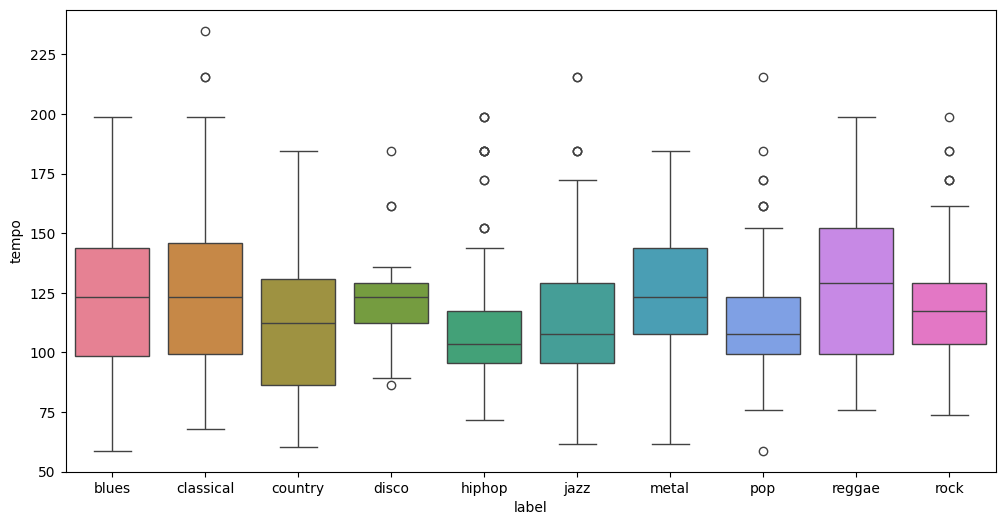

In [20]:
# Print a box plot
x = data2[["label", "tempo"]]

f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl')
plt.show()

### 2.2 Principal Component Analysis

#### Normalization

In [21]:
data2 = data2.iloc[0:, 1:]
# Get labels
y = data2['label']
# Get features without label
x = data2.loc[:, data2.columns != 'label']

cols = x.columns
# Use min max scaler
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(scaled, columns=cols)
x


length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0       0.0          0.362324         0.695991  0.318208  0.102011   
1       0.0          0.344012         0.793926  0.230836  0.085539   
2       0.0          0.390002         0.641242  0.433602  0.099203   
3       0.0          0.473957         0.778957  0.346093  0.228690   
4       0.0          0.278236         0.681784  0.219753  0.083049   
..      ...               ...              ...       ...       ...   
994     0.0          0.366475         0.565860  0.188934  0.012332   
995     0.0          0.461578         0.481127  0.181251  0.021128   
996     0.0          0.528985         0.483131  0.194388  0.011492   
997     0.0          0.387696         0.739396  0.200124  0.043391   
998     0.0          0.379028         0.649573  0.125254  0.011998   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                  0.314186               0.040225                 0.422546   
1                  0.248324               0.121568                 0.436324   
2                  0.254214               0.049076                 0.324725   
3                  0.129362               0.058314                 0.266809   
4                  0.327406               0.110775                 0.325102   
..                      ...                    ...                      ...   
994                0.372176               0.090564                 0.462281   
995                0.371522               0.057300                 0.447672   
996                0.389934               0.073906                 0.393514   
997                0.214353               0.076839                 0.351714   
998                0.268894               0.136899                 0.343709   

     spectral_bandwidth_var  rolloff_mean  ...  mfcc16_mean  mfcc16_var  \
0                  0.109168      0.385634  ...     0.563725    0.112647   
1                  0.296395      0.353158  ...     0.569975    0.120199   
2                  0.095018      0.289086  ...     0.622105    0.081805   
3                  0.227311      0.181096  ...     0.564637    0.091796   
4                  0.113014      0.357197  ...     0.383421    0.200009   
..                      ...           ...  ...          ...         ...   
994                0.113246      0.442113  ...     0.599883    0.093252   
995                0.103454      0.428620  ...     0.666124    0.064248   
996                0.092861      0.413934  ...     0.601299    0.063385   
997                0.143160      0.285753  ...     0.441532    0.096675   
998                0.159570      0.314974  ...     0.599299    0.129953   

     mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0       0.541429    0.057951     0.422907    0.082832     0.488195   
1       0.575256    0.118023     0.448542    0.103326     0.548838   
2       0.331309    0.086358     0.371498    0.116833     0.453991   
3       0.484604    0.092829     0.461143    0.069288     0.538843   
4       0.410296    0.156835     0.404087    0.120492     0.424659   
..           ...         ...          ...         ...          ...   
994     0.137029    0.070922     0.528219    0.066948     0.355028   
995     0.222209    0.064778     0.506271    0.052443     0.332509   
996     0.152543    0.057393     0.563969    0.064893     0.178065   
997     0.446255    0.076037     0.494873    0.059834     0.405430   
998     0.353915    0.152664     0.438640    0.192984     0.496364   

     mfcc19_var  mfcc20_mean  mfcc20_var  
0      0.109636     0.599323    0.078526  
1      0.099261     0.579837    0.076211  
2      0.087425     0.501540    0.045689  
3      0.062868     0.468235    0.048425  
4      0.130283     0.233225    0.095074  
..          ...          ...         ...  
994    0.109014     0.530782    0.084601  
995    0.067900     0.485488    0.047842  
996    0.076666     0.505131    0.044224  
997    0.088946     0.463259    0.067116  


#### PCA

In [22]:
# Use PCA to 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
# Create a new data form to save data after pca
pca_data = pd.DataFrame(data = principal_components, columns=['Pc1', 'Pc2'])

# Combined data
final_data = pd.concat([pca_data, y], axis = 1)

pca.explained_variance_ratio_

array([0.25061772, 0.21805407])

#### Scatterplot

<Axes: xlabel='Pc1', ylabel='Pc2'>

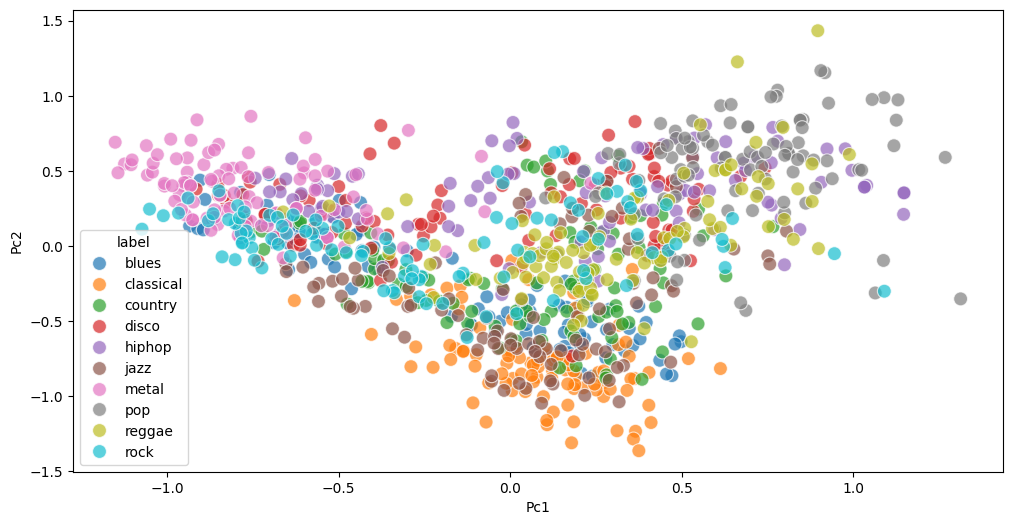

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Pc1', y='Pc2', data=final_data, hue='label', alpha=0.7,s=100)

## Part 3: Data preprocessing

### 3.1 Data for CNN (From wav files)

In [103]:
# Load the vggish model.
vggish = hub.load('https://kaggle.com/models/google/vggish/frameworks/TensorFlow2/variations/vggish/versions/1')

In [104]:
# Function to extract audio features using VGGish
def extractFeatures(audioFile):
    try:
        # Loading audio file
        waveform, sr = librosa.load(audioFile)
        
        # Trimming silence
        waveform, _ = librosa.effects.trim(waveform)
        
        # Extracting features using VGGish
        return vggish(waveform).numpy()
    except:
        return None

In [105]:
# Root directory containing the audio files
root = 'archive\Data\genres_original'
data = []

# Iterating through the folders and files to extract features
for folder in os.listdir(root):
    folderPath = os.path.join(root, folder)
    
    for file in tqdm(os.listdir(folderPath), desc = f'Processing folder {folder}'):
        filePath = os.path.join(folderPath, file)
        features = extractFeatures(filePath)
        
        if features is not None:
            data.append([features, folder])

Processing folder jazz:  54%|█████▍    | 54/100 [00:11<00:09,  4.67it/s]C:\Users\Eazy\AppData\Local\Temp\ipykernel_14768\3964492277.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  waveform, sr = librosa.load(audioFile)
d:\Python\lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing folder rock: 100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


In [106]:
data = pd.DataFrame(data, columns = ['Features', 'Class'])
data.head()

Features  Class
0  [[-0.34517685, 0.30739975, 0.21782875, -0.2811...  blues
1  [[-0.1674903, 0.2567157, 0.19068535, -0.035838...  blues
2  [[-0.7940438, 0.89984024, 0.4954068, -0.263958...  blues
3  [[-0.8552463, 0.55414677, 0.40423265, -0.23273...  blues
4  [[-0.6642171, -0.22497979, 0.002530098, -0.086...  blues

In [107]:
data.shape

(999, 2)

#### Check the data balance

C:\Users\Eazy\AppData\Local\Temp\ipykernel_14768\1963688630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = data['Class'], palette = 'viridis')


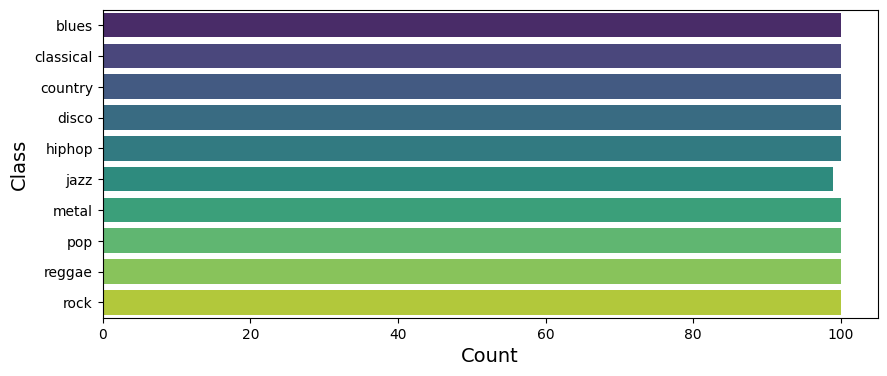

In [114]:
plt.figure(figsize = (10, 4))
sns.countplot(y = data['Class'], palette = 'viridis')
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Class', fontsize = 14)
plt.show()

In [109]:
# Alignment feature number
x = data['Features'].tolist()
x = pad_sequences(x, dtype = 'float32', padding = 'post', truncating = 'post')
x.shape

(999, 43, 128)

#### Label encoder target variable

In [120]:
# Encode the label data to int
encoder = LabelEncoder()
y = data['Class']

y = encoder.fit_transform(y)
y = to_categorical(y)

#### Split data into traing and teating set

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [112]:
print(x_train.shape)
print(y_train.shape)

(749, 43, 128)
(749, 10)


### 3.1 Data for other models (From csv files)

In [30]:
csv_data = pd.read_csv('features_30_sec.csv')
csv_data = csv_data.iloc[0:,2:]
csv_data.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.349951         0.088752  0.130192  0.002830   
1          0.340945         0.094968  0.095892  0.002374   
2          0.363562         0.085277  0.175494  0.002753   
3          0.404848         0.094018  0.141139  0.006340   
4          0.308598         0.087850  0.091540  0.002305   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1784.416546          129739.837401              2002.657106   
1             1529.871314          376011.650101              2038.612143   
2             1552.637786          156538.294709              1747.382028   
3             1070.110059          184506.655421              1596.244204   
4             1835.507009          343334.237041              1748.367477   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_var  \
0            85829.345908   3806.418650  9.013297e+05  ...   52.464140   
1           213889.873843   3548.986873  2.976792e+06  ...   55.364292   
2            76150.688778   3041.089944  7.829465e+05  ...   40.620193   
3           166637.568438   2185.061787  1.494194e+06  ...   44.456993   
4            88460.061228   3581.003346  1.572133e+06  ...   86.012780   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.688358   36.564606    -0.409329   41.643623    -2.298869   55.076675   
1    -0.717028   60.113300     0.292333   48.137740    -0.285717   51.131210   
2    -7.721793   47.700275    -1.816497   52.418175    -3.434354   46.630066   
3    -3.320056   50.236970     0.637263   37.351920    -0.617507   37.291164   
4    -5.453736   75.328180    -0.924468   53.577564    -4.408076   62.928513   

   mfcc20_mean  mfcc20_var  label  
0     1.219947   46.975636  blues  
1     0.532144   45.823235  blues  
2    -2.231391   30.626228  blues  
3    -3.406940   31.988438  blues  
4   -11.701833   55.215122  blues  

[5 rows x 56 columns]

In [31]:
x2 = csv_data.loc[:, csv_data.columns != 'label']
y2 = csv_data['label']

# Normalize the data
cols = x2.columns
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(x2)
x2 = pd.DataFrame(scaled, columns=cols)

In [32]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3,random_state=2)

## Part 4: Modeling

### 4.1 Model building

#### CNN

In [16]:
def CNN():
    Cnn = Sequential()
    
    # First convolutional layer with batch normalization
    Cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=(43,128,1)))
    Cnn.add(BatchNormalization())
    Cnn.add(Activation('relu'))
    Cnn.add(MaxPooling2D((2, 2)))
    Cnn.add(Dropout(0.2))

    # Second convolutional layer with batch normalization
    Cnn.add(Conv2D(64, (3, 3), padding='same'))
    Cnn.add(BatchNormalization())
    Cnn.add(Activation('relu'))
    Cnn.add(MaxPooling2D((2, 2)))
    Cnn.add(Dropout(0.3))

    # Third convolutional layer with batch normalization
    Cnn.add(Conv2D(128, (3, 3), padding='same'))
    Cnn.add(BatchNormalization())
    Cnn.add(Activation('relu'))
    Cnn.add(MaxPooling2D((2, 2)))
    Cnn.add(Dropout(0.4))

    # Flatten and fully connected layer with batch normalization
    Cnn.add(Flatten())
    Cnn.add(Dense(128))
    Cnn.add(BatchNormalization())
    Cnn.add(Activation('relu'))
    Cnn.add(Dropout(0.5))

    # Output layer with softmax activation
    Cnn.add(Dense(10, activation='softmax'))

    return Cnn
Cnn = CNN()

Cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

Cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 43, 128, 32)       320       
                                                                 
 batch_normalization_8 (Bat  (None, 43, 128, 32)       128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 43, 128, 32)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 21, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 21, 64, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 64, 64)       

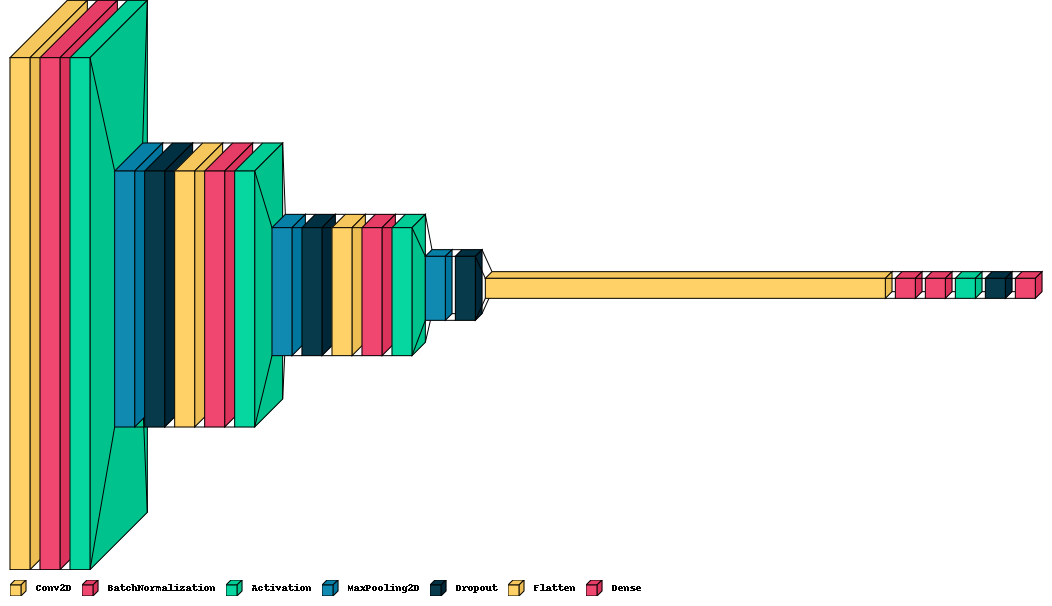

In [38]:
layered_view(Cnn, legend = True)

#### CNN evaluation

In [40]:
history = Cnn.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 40,
)

Epoch 1/40


24/24 [==============================] - 3s 74ms/step - loss: 1.9354 - accuracy: 0.3858 - val_loss: 2.3575 - val_accuracy: 0.1880
Epoch 2/40
24/24 [==============================] - 2s 64ms/step - loss: 1.1157 - accuracy: 0.6368 - val_loss: 2.9522 - val_accuracy: 0.2520
Epoch 3/40
24/24 [==============================] - 1s 60ms/step - loss: 0.9153 - accuracy: 0.7023 - val_loss: 3.5060 - val_accuracy: 0.1280
Epoch 4/40
24/24 [==============================] - 1s 61ms/step - loss: 0.8472 - accuracy: 0.7343 - val_loss: 3.9330 - val_accuracy: 0.1240
Epoch 5/40
24/24 [==============================] - 1s 61ms/step - loss: 0.7303 - accuracy: 0.7477 - val_loss: 4.4368 - val_accuracy: 0.1200
Epoch 6/40
24/24 [==============================] - 1s 58ms/step - loss: 0.6920 - accuracy: 0.7757 - val_loss: 4.8174 - val_accuracy: 0.1200
Epoch 7/40
24/24 [==============================] - 1s 62ms/step - loss: 0.6365 - accuracy: 0.7997 - val_loss: 4.7094 - val_accuracy: 0.1240
Epoch 8/40
24/24 [======

<Axes: >

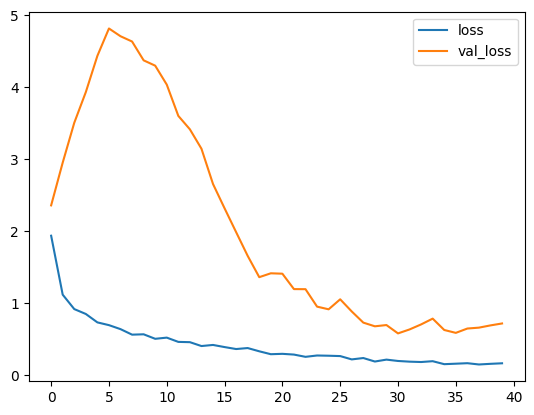

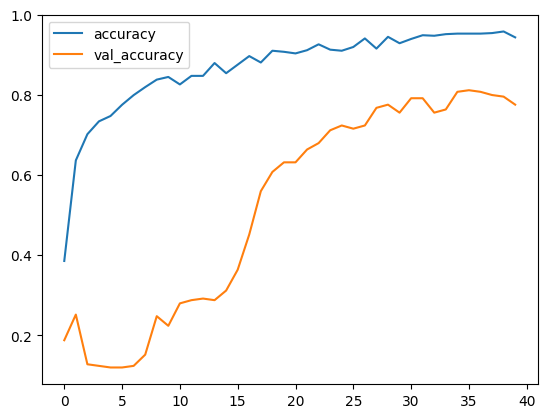

In [41]:
historyData = pd.DataFrame(history.history)
historyData.loc[:,['loss', 'val_loss']].plot()
historyData.loc[:, ['accuracy', 'val_accuracy']].plot()

#### Other models

In [28]:
# Decision trees
Tree = DecisionTreeClassifier()

# Random Forest
Rf = RandomForestClassifier()

# Logistic Regression
Lr = LogisticRegression()

In [43]:
def model_evaluation(model, title):
    model.fit(x_train2, y_train2)
    preds = model.predict(x_test2)
    print(confusion_matrix(y_test2, preds))
    print('Accuracy for', title, ':', round(accuracy_score(y_test2, preds), 5), '\n')

Models = [Tree, Rf, Lr]
for model in Models:
    model_evaluation(model, str(model))

[[11  1  4  1  0  4  1  0  1  1]
 [ 1 24  1  0  0  5  0  0  0  1]
 [ 2  1 10  7  0  7  0  1  1  5]
 [ 4  1  1 10  5  0  2  2  0  5]
 [ 0  0  0  0 10  1  2  6  8  2]
 [ 0  2  3  0  0 23  0  0  0  0]
 [ 1  0  1  1  1  1 21  1  0  3]
 [ 1  0  2  2  3  1  1 14  1  2]
 [ 2  0  2  5  3  0  2  2 18  3]
 [ 2  0  6  4  3  2  0  1  5  6]]
Accuracy for DecisionTreeClassifier() : 0.49 

[[15  0  3  1  0  3  0  0  1  1]
 [ 0 26  0  0  0  6  0  0  0  0]
 [ 1  0 25  2  0  2  0  0  1  3]
 [ 1  1  0 18  3  0  2  3  1  1]
 [ 3  0  0  0 13  0  1  5  7  0]
 [ 1  0  2  0  0 24  0  1  0  0]
 [ 2  0  0  0  0  0 27  0  0  1]
 [ 0  0  0  2  2  0  0 20  2  1]
 [ 1  0  1  2  2  0  1  5 23  2]
 [ 1  0  3  5  1  1  1  1  3 13]]
Accuracy for RandomForestClassifier() : 0.68 

[[14  0  1  1  0  3  1  0  0  4]
 [ 0 31  0  0  0  1  0  0  0  0]
 [ 3  1 21  2  0  1  0  4  0  2]
 [ 1  1  0 13  2  1  5  4  1  2]
 [ 1  0  0  0 17  0  3  2  6  0]
 [ 2  0  1  0  0 24  0  1  0  0]
 [ 2  0  0  0  0  0 27  0  0  1]
 [ 0  1  0  2

d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 5: Tune models (Used Grid Search)

### 5.1 Tune and evaluate CNN

#### Find best parameter

In [54]:
Cnn = KerasClassifier(model=CNN, loss="binary_crossentropy", 
                      optimizer="adam", epochs=10, batch_size=10)

# Set parameters
optimizer = ['adam', 'sgd']
batch_size = [16, 32, 64]
epochs = [10, 30, 50]

param_grid = dict(optimizer=optimizer,batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=Cnn, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

print("Best: %f use %s" % (grid_result.best_score_, grid_result.best_params_))

D:\miniconda3\envs\MLA1\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
24/24 [==============================] - 2s 47ms/step - loss: 0.6096
Epoch 2/50
24/24 [==============================] - 1s 45ms/step - loss: 0.3366
Epoch 3/50
24/24 [==============================] - 1s 45ms/step - loss: 0.2390
Epoch 4/50
24/24 [==============================] - 1s 45ms/step - loss: 0.1879
Epoch 5/50
24/24 [==============================] - 1s 46ms/step - loss: 0.1636
Epoch 6/50
24/24 [==============================] - 1s 45ms/step - loss: 0.1501
Epoch 7/50
24/24 [==============================] - 1s 45ms/step - loss: 0.1376
Epoch 8/50
24/24 [==============================] - 1s 44ms/step - loss: 0.1241
Epoch 9/50
24/24 [==============================] - 1s 44ms/step - loss: 0.1162
Epoch 10/50
24/24 [==============================] - 1s 44ms/step - loss: 0.1096
Epoch 11/50
24/24 [==============================] - 1s 45ms/step - loss: 0.1056
Epoch 12/50
24/24 [==============================] - 1s 46ms/step - loss: 0.0996
Epoch 13/50
24/24 [==================

#### Train CNN

Epoch 1/50



24/24 [==============================] - 3s 75ms/step - loss: 1.8972 - accuracy: 0.3818 - val_loss: 2.4145 - val_accuracy: 0.0935
Epoch 2/50
24/24 [==============================] - 2s 65ms/step - loss: 1.1302 - accuracy: 0.6088 - val_loss: 3.2978 - val_accuracy: 0.0935
Epoch 3/50
24/24 [==============================] - 2s 64ms/step - loss: 0.8847 - accuracy: 0.7036 - val_loss: 4.2104 - val_accuracy: 0.0935
Epoch 4/50
24/24 [==============================] - 2s 64ms/step - loss: 0.8080 - accuracy: 0.7410 - val_loss: 4.6260 - val_accuracy: 0.0935
Epoch 5/50
24/24 [==============================] - 2s 69ms/step - loss: 0.7626 - accuracy: 0.7503 - val_loss: 4.8900 - val_accuracy: 0.0935
Epoch 6/50
24/24 [==============================] - 2s 70ms/step - loss: 0.7016 - accuracy: 0.7650 - val_loss: 4.9754 - val_accuracy: 0.0935
Epoch 7/50
24/24 [==============================] - 2s 66ms/step - loss: 0.6407 - accuracy: 0.8051 - val_loss: 4.9783 - val_accuracy: 0.0935
Epoch 8/50
24/24 [======

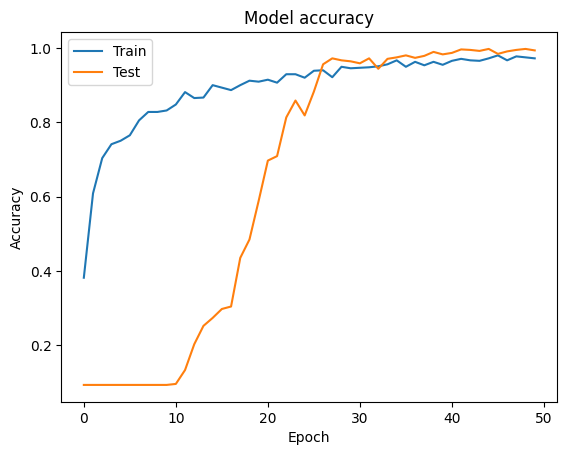

In [17]:
def train_CNN(CNN, x_train, y_train, x_val, y_val):
    history = CNN.fit(
        x_train, y_train,
        optimizer = 'adam'
        epochs = 50,
        batch_size = 32,
        validation_data = (x_val, y_val)
    )
    # Plot training & validation accuracy values
    # your code starts here
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    # your code ends here
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return history

x_val, y_val = x_train[-10000:], y_train[-10000:]
train_CNN(Cnn, x_train, y_train, x_val, y_val)

#### CNN Evaluation

In [160]:
y_pred = Cnn.predict(x_test).argmax(axis=1)
y2 = data['Class']

_, y_test_label = train_test_split(y2, random_state=0)
y_test_label = list(y_test_label)

y_pred = encoder.inverse_transform(y_pred)

print(classification_report(y_test_label,y_pred))


8/8 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

       blues       0.87      0.59      0.70        22
   classical       0.94      0.94      0.94        16
     country       0.91      0.70      0.79        30
       disco       0.86      0.70      0.78        27
      hiphop       0.97      0.90      0.93        31
        jazz       1.00      0.95      0.97        19
       metal       0.96      1.00      0.98        26
         pop       0.90      0.76      0.83        25
      reggae       0.88      0.75      0.81        28
        rock       0.42      0.88      0.57        26

    accuracy                           0.81       250
   macro avg       0.87      0.82      0.83       250
weighted avg       0.87      0.81      0.82       250



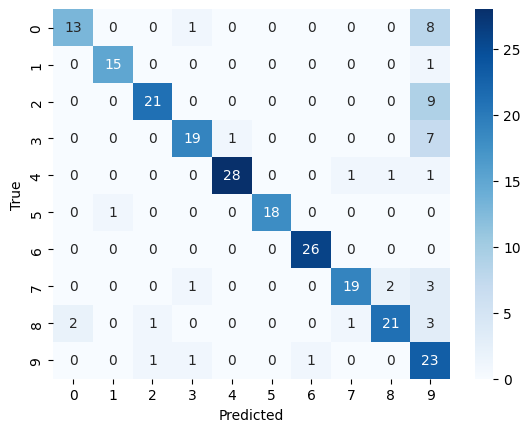

In [161]:
cm = confusion_matrix(y_test_label, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 5.2 Tune and evaluate other models

##### DecisionTreeClassifier

In [55]:
Tree_grid = GridSearchCV(Tree,[{"max_depth":[10, 20, 30], 
                                "min_samples_split":[2, 4], 
                                "min_samples_leaf":[1, 2]}], 
                                scoring = "accuracy", cv=10)
Tree_grid.fit(x_train2, y_train2)
best_accuracy = Tree_grid.best_score_
bset_parameters = Tree_grid.best_params_
print("DecisionTreeClassifier", "\n best accuracy is:", best_accuracy)
print("best parameters are:", bset_parameters)

DecisionTreeClassifier 
 best accuracy is: 0.51
best parameters are: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [56]:
y_pred = Tree_grid.predict(x_test2)
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

       blues       0.39      0.58      0.47        24
   classical       0.82      0.84      0.83        32
     country       0.52      0.50      0.51        34
       disco       0.42      0.43      0.43        30
      hiphop       0.46      0.45      0.46        29
        jazz       0.51      0.66      0.58        29
       metal       0.80      0.53      0.64        30
         pop       0.47      0.58      0.52        26
      reggae       0.52      0.41      0.45        37
        rock       0.19      0.14      0.16        29

    accuracy                           0.51       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.52      0.51      0.51       300


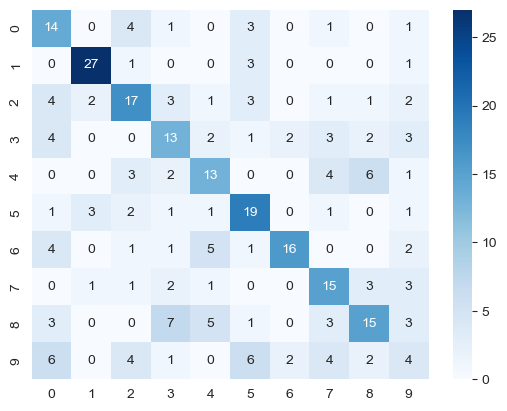

In [57]:
cfm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cfm, annot=True, fmt = 'd', cmap='Blues')
plt.show()

##### RandomForestClassifier

In [58]:
Rf_grid = GridSearchCV(Rf,[{"n_estimators":[100, 200], 
                            "max_depth":[None, 10], 
                            "min_samples_leaf":[1, 2]}], 
                            scoring = "accuracy", cv=10)
Rf_grid.fit(x_train2, y_train2)
best_accuracy = Rf_grid.best_score_
bset_parameters = Rf_grid.best_params_
print("RandomForestClassifier", "\n best accuracy is:", best_accuracy)
print("best parameters are:", bset_parameters)

RandomForestClassifier 
 best accuracy is: 0.7071428571428571
best parameters are: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


In [59]:
y_pred = Rf_grid.predict(x_test2)
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

       blues       0.68      0.62      0.65        24
   classical       0.93      0.84      0.89        32
     country       0.66      0.74      0.69        34
       disco       0.61      0.67      0.63        30
      hiphop       0.70      0.48      0.57        29
        jazz       0.66      0.86      0.75        29
       metal       0.83      0.83      0.83        30
         pop       0.75      0.81      0.78        26
      reggae       0.64      0.68      0.66        37
        rock       0.43      0.34      0.38        29

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.69      0.69      0.69       300


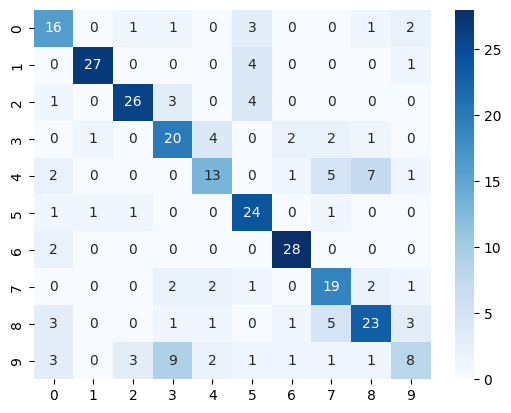

In [63]:
cfm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cfm, annot=True, fmt = 'd', cmap='Blues')
plt.show()

##### LogisticRegression

In [64]:
Lr_grid = GridSearchCV(Lr,[{"C":[0.01, 1.0], "solver":['liblinear', 'saga'], 
                            "penalty":['l2', 'none']}], 
                            scoring = "accuracy", cv=10)
Lr_grid.fit(x_train2, y_train2)
best_accuracy = Lr_grid .best_score_
bset_parameters = Lr_grid .best_params_
print("LogisticRegression", "\n best accuracy is:", best_accuracy)
print("best parameters are:", bset_parameters)

d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

LogisticRegression 
 best accuracy is: 0.7124430641821945
best parameters are: {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}


d:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
y_pred = Lr_grid.predict(x_test2)
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

       blues       0.54      0.62      0.58        24
   classical       0.97      0.97      0.97        32
     country       0.74      0.68      0.71        34
       disco       0.69      0.67      0.68        30
      hiphop       0.67      0.62      0.64        29
        jazz       0.74      0.82      0.78        28
       metal       0.84      0.90      0.87        30
         pop       0.66      0.85      0.74        27
      reggae       0.81      0.57      0.67        37
        rock       0.52      0.52      0.52        29

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300


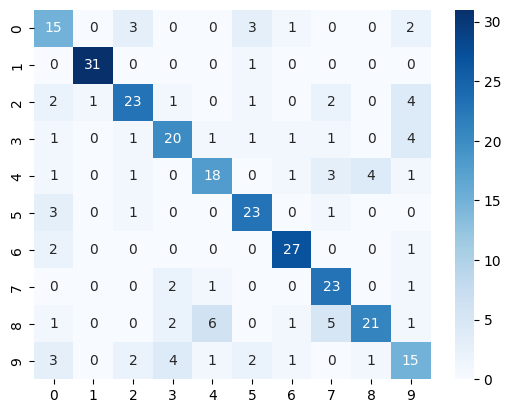

In [66]:
cfm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cfm, annot=True, fmt = 'd', cmap='Blues')
plt.show()